<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML-F1/blob/master/Regression/Exercices/CH3_Ex3_EntrainementModele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialisation des données et des fonctions pour l'apprentissage automatique des iris

In [23]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math

iris = datasets.load_iris()

def sigmoid(z):
  return 1.0/(1 + math.exp(-z))

def predict(echantillon):
  result  = 0.0
  for i in range(len(echantillon)):
    result = result + poids[i] * echantillon[i]
  result = result + offset
  return sigmoid(result)

def pertes(y_attendu, y_predit):
  return -(y_attendu * math.log(y_predit) + (1.0 - y_attendu) * math.log(1 - y_predit))

nbr_caracteristiques = 4

def entrainement_sur_une_iteration(echantillons, valeurs_attendues):
  pertes_totales = 0.0                # Initialise la somme des pertes à 0
  dLw = [0.0] * nbr_caracteristiques  # dLw permettra de stocker les variations des pertes L par rapport aux poids w : L'(w)
  dJw = [0.0] * nbr_caracteristiques  # dJw permettra de stocker les variations du cout par rapport aux poids w : J'(w)
  dLb = 0.0                           # dLb permettra de stocker la variation des pertes L par rapport à l'offset b : L'(b)
  dJb = 0.0                           # dJb permettra de stocker la variation du cout par rapport à l'offset b : J'(b)

  global offset, poids

  m = len(echantillons)                   # m contient le nombre d'échantillons (150)
  for i in range(m):
    ech = echantillons[i]                 # ech contient le i-ème échantillon : [longueur_sépale, largeur_sépale, longueur_pétale, largeur_pétale]
    val_attendue = valeurs_attendues[i]   # val_attendue contient la valeur attendue pour cet echantillon que doit retourner le modèle (0 ou 1)
    valeur_predite = predict(ech)         # Appel de la fonction de prédiction pour calculer la valeur prédite par le modèle sur cet échantillon 
    pertes_totales = pertes_totales + pertes(val_attendue, valeur_predite)   # Additionne les pertes de chaque échantillon afin de calculer le coût
    
    # Pour chaque poids, on somme la variation des pertes par rapport aux poids w : sigma[L'(w)]
    for j in range(len(poids)):
      dLw[j] = dLw[j] + ech[j]*(valeur_predite - val_attendue)

    # On somme la variation des pertes en fonction de l'offset b : sigma[L'(b)]
    dLb = dLb + (valeur_predite - val_attendue)
  
  cout = pertes_totales / m                 # Le coût J est la valeur moyenne des pertes sur l'ensemble des 150 échantillons
  dJb = dLb / m                             # Calcul la variation du coût par rapport à l'offset J'(b) : Le coût est la moyenne de la variation des pertes sur l'ensemble des 150 échantillons
  offset = offset - taux_apprentissage*dJb  # Applique l'algorithme du gradient sur l'offset : bk+1 = bk - alpha*J'(b)

  for j in range(len(poids)):
    dJw[j] = dLw[j] / m       # Calcule la variation du coût par rapport au j-ème poids J'(w)
    poids[j] = poids[j] - taux_apprentissage*dJw[j]    # Applique l'algortithme du gradient sur le j-ème poids : wk+1 = wk - alpha*J'(w)
  
  return cout

### Algorithme d'entrainement du modèle - iris catégorie 2

Cet algorithme va itérer l'algorithme de rétropopagation du gradient de nombreuses fois afin de minimiser les poids et l'offset.

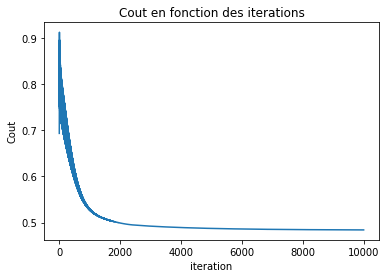

In [35]:
# Entrainement du modèle pour "apprendre" les valeurs optimales des poids et de l'offset

poids = [0.0] * nbr_caracteristiques
offset = 0.0

taux_apprentissage = 0.18

iterations = 10000

echantillons_a_tester = iris.data
valeurs_attendues_des_echantillons = [1 if y == 1 else 0 for y in iris.target]

tableau_couts = []
for epoch in range(iterations):
  valeur_cout = entrainement_sur_une_iteration(echantillons_a_tester, valeurs_attendues_des_echantillons)
  tableau_couts.append(valeur_cout)

plt.plot(range(iterations), tableau_couts)
plt.ylabel('Cout')
plt.xlabel('iteration')
plt.title('Cout en fonction des iterations')
plt.show()

### Algorithme d'entrainement du modèle - iris catégorie 3

Cet algorithme va itérer l'algorithme de rétropopagation du gradient de nombreuses fois afin de minimiser les poids et l'offset.

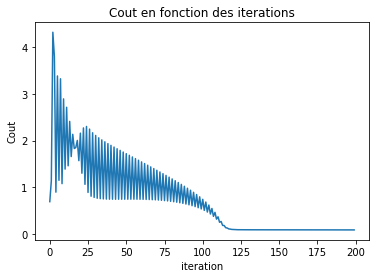

In [30]:
# Entrainement du modèle pour "apprendre" les valeurs optimales des poids et de l'offset

poids = [0.0] * nbr_caracteristiques
offset = 0.0

taux_apprentissage = 0.5

iterations = 200

echantillons_a_tester = iris.data
valeurs_attendues_des_echantillons = [1 if y == 2 else 0 for y in iris.target]

tableau_couts = []
for epoch in range(iterations):
  valeur_cout = entrainement_sur_une_iteration(echantillons_a_tester, valeurs_attendues_des_echantillons)
  tableau_couts.append(valeur_cout)

plt.plot(range(iterations), tableau_couts)
plt.ylabel('Cout')
plt.xlabel('iteration')
plt.title('Cout en fonction des iterations')
plt.show()